<a href="https://colab.research.google.com/github/Hugonogo/simulated_annealing/blob/main/Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

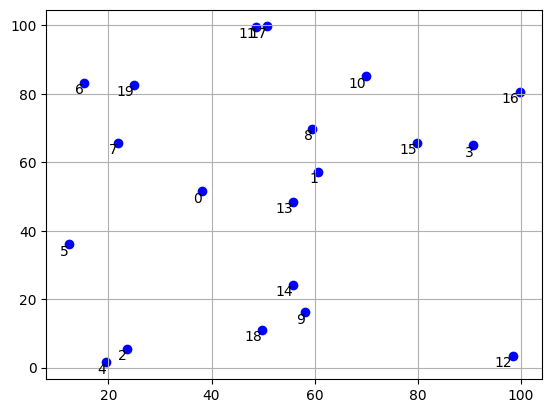

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
## Exemplo de um Algoritmo de simulated annealing
## resolvendo o problema do caixeiro viajante


# Gerar cidades aleatórias
num_cidades = 20
# Define o número de cidades a serem geradas, neste caso, 20 cidades

cidades = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_cidades)]
# Gera coordenadas aleatórias para as cidades em um plano bidimensional.
# Cada cidade é representada por um par de coordenadas (x, y).
# A função random.uniform(0, 100) gera números aleatórios entre 0 e 100 para as coordenadas x e y.
# O loop for cria uma lista de coordenadas para o número especificado de cidades.

cidades_x, cidades_y = zip(*cidades)
# Separa as coordenadas x e y das cidades geradas em listas separadas
# A função zip(*cidades) "descompacta" a lista de coordenadas, separando-as em duas listas.

plt.scatter(cidades_x, cidades_y, c='blue', marker='o', label='Cidades')
# Cria um gráfico de dispersão com as coordenadas x e y das cidades.
# As cidades são representadas como pontos azuis ('blue') com marcadores circulares ('o').
# 'label' atribui um rótulo ao conjunto de pontos, chamado de "Cidades."

plt.grid()
# Adiciona uma grade ao gráfico, tornando mais fácil visualizar as posições das cidades.

for i, (x, y) in enumerate(cidades):
    plt.text(x, y, str(i), fontsize=10, ha='right', va='top')
# Enumera os Pontos

plt.show()
# Exibe o gráfico com as cidades geradas.


In [ ]:

# Função para calcular a distância entre duas cidades
def calcular_distancia(cidade1, cidade2):
    return np.linalg.norm(np.array(cidade1) - np.array(cidade2))
    # Calcula a distância euclidiana entre duas cidades usando NumPy

# Função para calcular a distância total da rota
def calcular_distancia_total(rota, cidades):
    distancia = 0
    for i in range(len(rota) - 1):
        distancia += calcular_distancia(cidades[rota[i]], cidades[rota[i+1]])
    distancia += calcular_distancia(cidades[rota[-1]], cidades[rota[0]])  # Voltar à cidade de origem
    return distancia
    # Calcula a distância total de uma rota passando por uma lista de cidades
    # Utiliza a função calcular_distancia para calcular a distância entre cidades consecutivas

Rota: [13, 6, 9, 16, 7, 15, 4, 14, 12, 11, 17, 2, 5, 10, 1, 8, 0, 3, 18, 19]
Distância: 1155.8052205582896


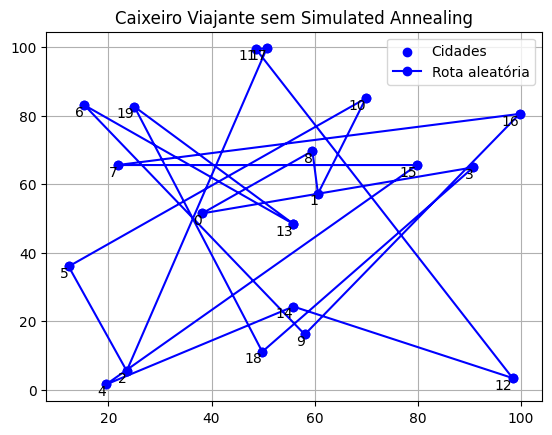

In [ ]:
def rotas_aleatorias(cidades):
    num_cidades = len(cidades)
    rota = random.sample(range(num_cidades), num_cidades)
    # Cria uma rota aleatória, que é uma permutação aleatória das cidades
    return rota
    # Retorna a rota aleatória

# Simular uma rota aleatória
rota = rotas_aleatorias(cidades)
# Chama a função 'rotas_aleatorias' para gerar uma rota aleatória e armazena a rota e distâncias

# Plotar as cidades
print("Rota:", rota)
print("Distância:", calcular_distancia_total(rota, cidades))
# Imprime a rota aleatória gerada e a distância total da rota
cidades_x, cidades_y = zip(*cidades)
plt.scatter(cidades_x, cidades_y, c='blue', marker='o', label='Cidades')
# Cria um gráfico de dispersão para representar as cidades

rota_cidades = [cidades[i] for i in rota]  # Coordenadas das cidades na rota aleatória
rota_cidades.append(rota_cidades[0])  # Adicionar a primeira cidade para formar um loop
# Cria uma lista com as coordenadas das cidades na rota aleatória e adiciona a primeira cidade para formar um loop
rota_x, rota_y = zip(*rota_cidades)
plt.plot(rota_x, rota_y, linestyle='-', marker='o', c='blue', label='Rota aleatória')
# Cria um gráfico de linha para representar a rota aleatória
plt.title("Caixeiro Viajante sem Simulated Annealing")
plt.legend()
plt.grid(True)  # Adiciona uma grade ao gráfico

for i, (x, y) in enumerate(cidades):
    plt.text(x, y, str(i), fontsize=10, ha='right', va='top')
# Enumera os Pontos

plt.show()  # Exibe o gráfico



Melhor Rota: [2, 18, 9, 12, 16, 3, 14, 0, 13, 1, 8, 15, 10, 17, 11, 19, 6, 7, 5, 4]
Distância Mínima: 498.7399629105736


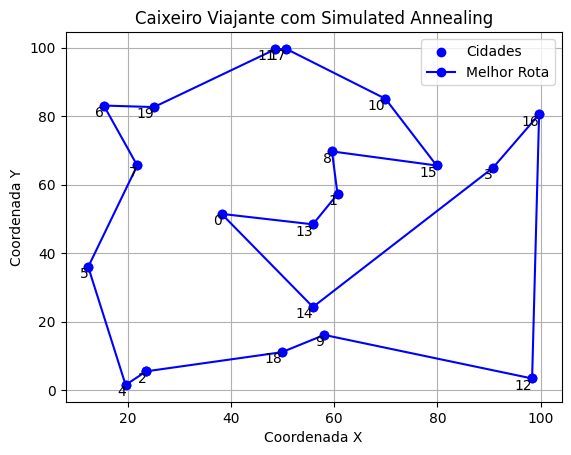

In [ ]:
# Função de resfriamento exponencial para o Simulated Annealing
def resfriamento_exponencial(temp, alpha):
    return temp * alpha
    # Atualiza a temperatura multiplicando-a pelo fator de resfriamento "alpha"

# Função principal do Simulated Annealing
def simulated_annealing(cidades, temp_inicial, alpha):
    num_cidades = len(cidades)
    melhor_rota = random.sample(range(num_cidades), num_cidades)
    # Inicializa a melhor rota como uma permutação aleatória das cidades
    melhor_distancia = calcular_distancia_total(melhor_rota, cidades)
    # Calcula a distância total da melhor rota
    temperatura = temp_inicial
    distancias = []
    temperaturas = []

    while temperatura > 0.000001:
        nova_rota = melhor_rota.copy()
        # Cria uma nova rota copiando a melhor rota atual
        cidade1, cidade2 = random.sample(range(num_cidades), 2)
        # Seleciona duas cidades aleatórias para realizar uma troca
        nova_rota[cidade1], nova_rota[cidade2] = nova_rota[cidade2], nova_rota[cidade1]
        # Realiza a troca das duas cidades
        nova_distancia = calcular_distancia_total(nova_rota, cidades)
        # Calcula a distância total da nova rota
        delta_distancia = nova_distancia - melhor_distancia

        # Aceita a nova rota se for melhor ou com probabilidade decrescente
        if delta_distancia < 0 or random.random() < math.exp(-delta_distancia / temperatura):
            melhor_rota = nova_rota
            melhor_distancia = nova_distancia
        # Aceita a nova rota se for melhor ou com probabilidade decrescente baseada na temperatura

        distancias.append(melhor_distancia)
        temperatura = resfriamento_exponencial(temperatura, alpha)
        temperaturas.append(temperatura)
        # Atualiza a temperatura com a função de resfriamento exponencial

    return melhor_rota, distancias, temperaturas
    # Retorna a melhor rota encontrada e a lista de distâncias ao longo das iterações


# Parâmetros do Simulated Annealing
temp_inicial = 1000
alpha = 0.995


# Executar o Simulated Annealing
melhor_rota, distancias, temperaturas = simulated_annealing(cidades, temp_inicial, alpha)
# Chama a função 'simulated_annealing' para encontrar a melhor rota

print("Melhor Rota:", melhor_rota)
print("Distância Mínima:", calcular_distancia_total(melhor_rota, cidades))
# Imprime a melhor rota encontrada e sua distância mínima

# Plotar as cidades
cidades_x, cidades_y = zip(*cidades)
plt.scatter(cidades_x, cidades_y, c='blue', marker='o', label='Cidades')
# Cria um gráfico de dispersão para representar as cidades

# Plotar a rota final
melhor_rota_cidades = [cidades[i] for i in melhor_rota]  # Coordenadas das cidades na melhor rota
melhor_rota_cidades.append(melhor_rota_cidades[0])  # Adicionar a primeira cidade para formar um loop
rota_x, rota_y = zip(*melhor_rota_cidades)
plt.plot(rota_x, rota_y, linestyle='-', marker='o', c='blue', label='Melhor Rota')
# Cria um gráfico de linha para representar a melhor rota

plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.title("Caixeiro Viajante com Simulated Annealing")
plt.legend()
plt.grid(True)  # Adiciona uma grade ao gráfico

for i, (x, y) in enumerate(cidades):
    plt.text(x, y, str(i), fontsize=10, ha='right', va='top')
# Enumera os Pontos

plt.show()  # Exibe o gráfico


Melhor Rota: [2, 18, 9, 12, 16, 3, 14, 0, 13, 1, 8, 15, 10, 17, 11, 19, 6, 7, 5, 4]
Distância Mínima: 498.7399629105736


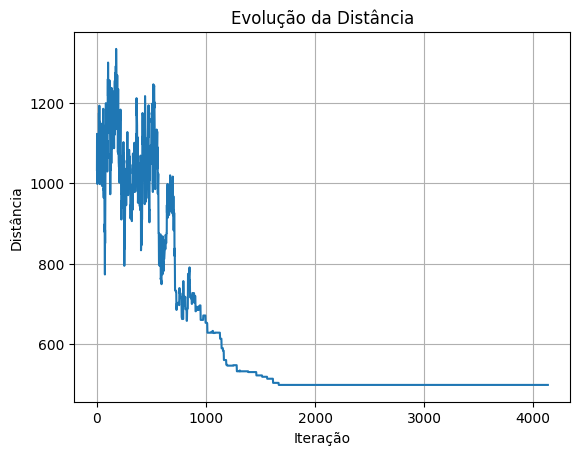

In [ ]:
# Plotar o gráfico da evolução da distância
print("Melhor Rota:", melhor_rota)
print("Distância Mínima:", calcular_distancia_total(melhor_rota, cidades))
# Imprime a melhor rota encontrada e sua distância mínima
fig, ax = plt.subplots()
# Cria uma figura e um eixo para o gráfico
ax.set_title("Evolução da Distância")  # Define o título do gráfico como "Evolução da Distância"
line, = ax.plot(distancias)  # Cria uma linha no gráfico com os valores da lista 'distancias'
plt.xlabel("Iteração")  # Define o rótulo do eixo x como "Iteração"
plt.ylabel("Distância")  # Define o rótulo do eixo y como "Distância"
plt.grid()

plt.show()  # Exibe o gráfico final


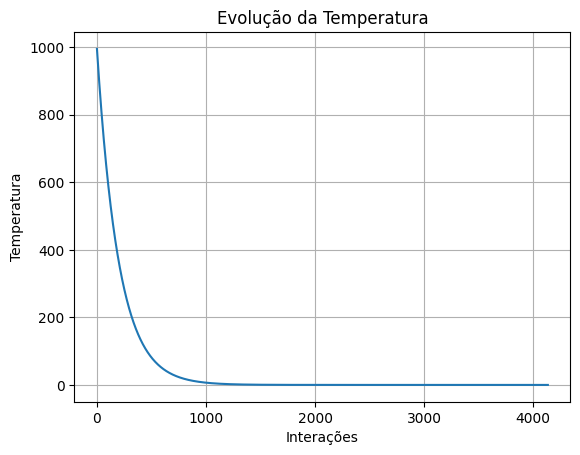

In [ ]:

fig, ax = plt.subplots()
# Cria uma figura e um eixo para o gráfico
ax.set_title("Evolução da Temperatura")  # Define o título do gráfico
line, = ax.plot(temperaturas)  # Cria uma linha no gráfico com os valores da lista 'Temperaturas'
plt.xlabel("Interações")  # Define o rótulo do eixo x como "Iteração"
plt.ylabel("Temperatura")  # Define o rótulo do eixo y como "Temperaturas"
plt.grid()
plt.show()  # Exibe o gráfico final